Shape of dataset: (42766, 73)
nr. sessions: Number of training sessions
total km: Total kilometers covered
km Z3-4: Kilometers in moderate-high intensity zone (Z3-Z4)
km Z5-T1-T2: Kilometers in high intensity zones
km sprinting: Distance covered while sprinting
strength training: Whether strength training was done (1: Yes, 0: No)
hours alternative: Hours spent on alternative training
perceived exertion: Athlete's subjective rating of effort/fatigue
perceived trainingSuccess: Athlete's perceived success of training
perceived recovery: Athlete's subjective recovery status
Athlete ID: Unique athlete identifier
injury: Whether an injury occurred in the following week
Date: Date of record


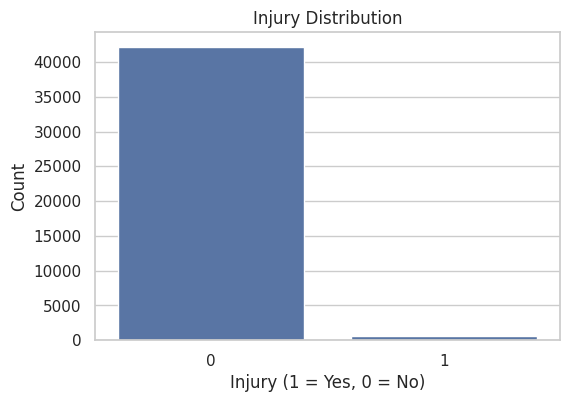

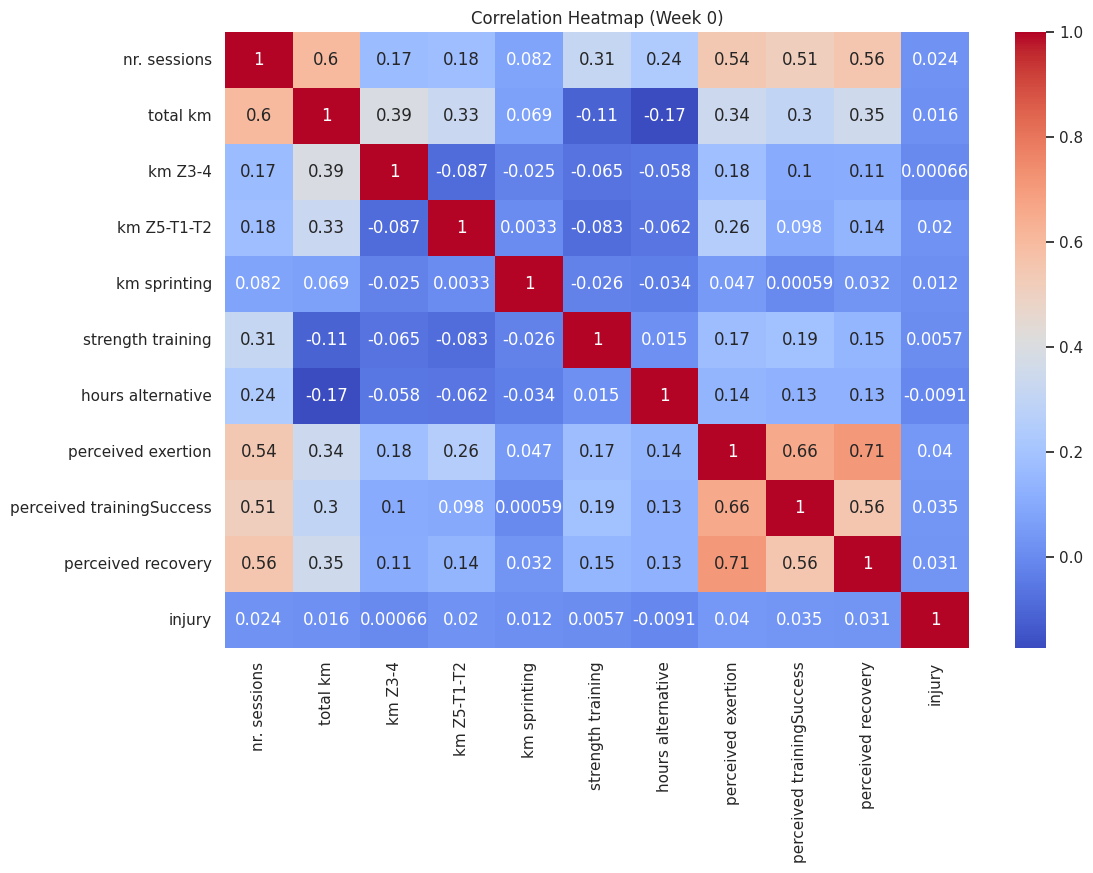

<Figure size 1400x600 with 0 Axes>

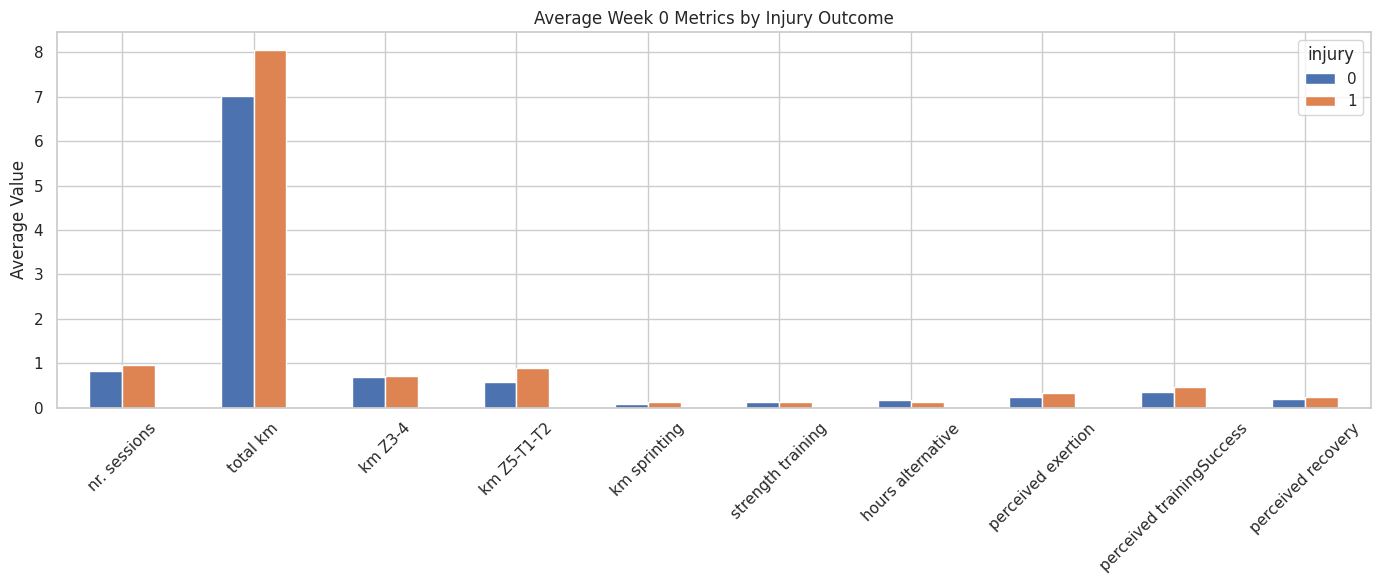

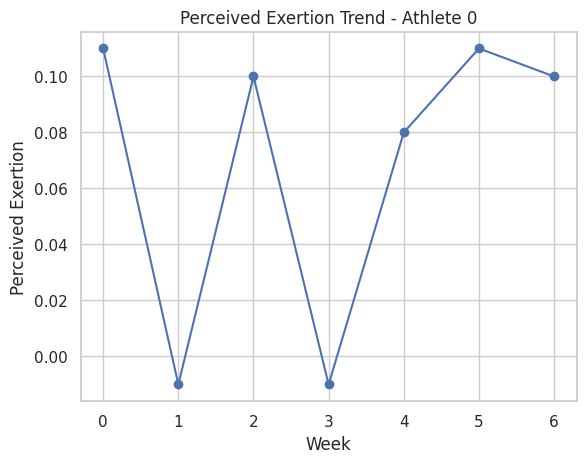

In [2]:
# Injury Data Analysis - Jupyter Notebook

## Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

## Step 2: Load Dataset
# Replace with your actual file path or use file upload in Jupyter
df = pd.read_csv("/content/drive/MyDrive/dataset-competition/timeseries-(daily).csv")  # Assuming CSV version

## Step 3: Understand the Dataset Structure
print("Shape of dataset:", df.shape)
df.head()

## Step 4: Column Description
column_descriptions = {
    "nr. sessions": "Number of training sessions",
    "total km": "Total kilometers covered",
    "km Z3-4": "Kilometers in moderate-high intensity zone (Z3-Z4)",
    "km Z5-T1-T2": "Kilometers in high intensity zones",
    "km sprinting": "Distance covered while sprinting",
    "strength training": "Whether strength training was done (1: Yes, 0: No)",
    "hours alternative": "Hours spent on alternative training",
    "perceived exertion": "Athlete's subjective rating of effort/fatigue",
    "perceived trainingSuccess": "Athlete's perceived success of training",
    "perceived recovery": "Athlete's subjective recovery status",
    "Athlete ID": "Unique athlete identifier",
    "injury": "Whether an injury occurred in the following week",
    "Date": "Date of record"
}

# Display descriptions
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")

## Step 5: Check for Missing Values
df.isnull().sum()

## Step 6: Basic Statistics
df.describe().T

## Step 7: Injury Count and Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='injury', data=df)
plt.title("Injury Distribution")
plt.xlabel("Injury (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

## Step 8: Correlation Analysis (Week 0 data only as example)
week0_cols = [col for col in df.columns if not any(col.endswith(f".{i}") for i in range(1, 7)) and col not in ['Athlete ID', 'injury', 'Date']]

plt.figure(figsize=(12, 8))
sns.heatmap(df[week0_cols + ['injury']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Week 0)")
plt.show()

## Step 9: Average Metrics by Injury Outcome
avg_by_injury = df.groupby('injury')[week0_cols].mean().T

plt.figure(figsize=(14, 6))
avg_by_injury.plot(kind='bar', figsize=(14, 6))
plt.title("Average Week 0 Metrics by Injury Outcome")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 10: Trend Over Weeks (for one athlete)
# Example: visualize an athlete's perceived exertion trend
athlete_id = df['Athlete ID'].iloc[0]
athlete_data = df[df['Athlete ID'] == athlete_id]

exertion_cols = [col for col in df.columns if "perceived exertion" in col]
plt.plot(range(7), athlete_data[exertion_cols].values[0], marker='o')
plt.title(f"Perceived Exertion Trend - Athlete {athlete_id}")
plt.xlabel("Week")
plt.ylabel("Perceived Exertion")
plt.xticks(range(7))
plt.grid(True)
plt.show()

## Step 11: Export Cleaned Dataset (optional)
#df.to_csv("/content/drive/MyDrive/dataset-competition/timeseries-(daily).csv", index=False)
